# OBJECTIVE
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.
Here our moto is to predict if the order was delivered on time.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('Train.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [2]:
label=data['Reached.on.Time_Y.N']

ID doesn't seems to have any importance so we could easily drop that columns

In [3]:
data.drop(['ID','Reached.on.Time_Y.N'],axis=1,inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 859.4+ KB


NO missing values in any column of the data.

### Numerical data 

In [5]:
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


### Categorical Data 

In [6]:
data.describe(include='object')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


## Warehouse_block 

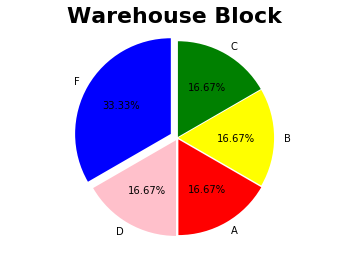

In [7]:
plt.pie(data.Warehouse_block.value_counts(),explode=[.8,.3,.2,.1,.1],startangle=90,autopct='%.2f%%',labels=['F','D','A','B','C'],radius=10,colors=['blue','pink','red','yellow','green'])
plt.axis('equal')
plt.title('Warehouse Block',fontdict={'fontsize':22,'fontweight':'bold'})
plt.show()

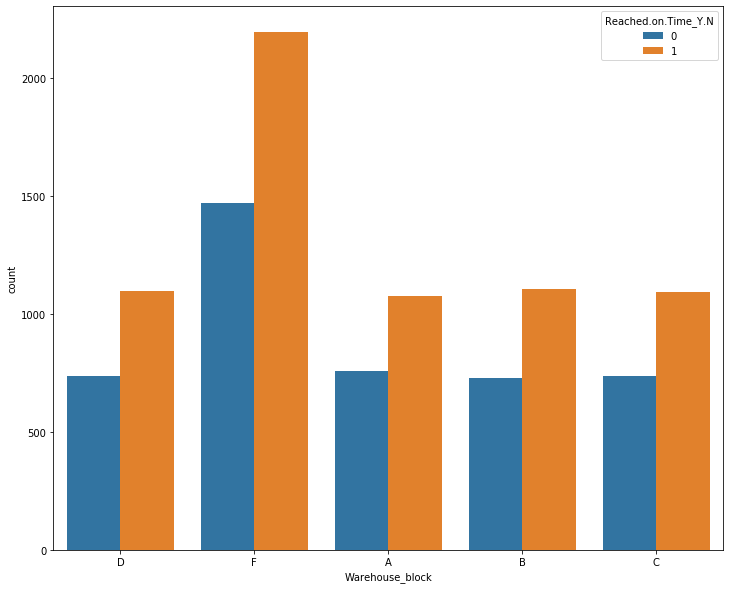

In [8]:
plt.figure(figsize=(12,10))
sns.countplot(data.Warehouse_block,hue=label)
plt.show()

In [9]:
data.Warehouse_block=pd.Categorical(data.Warehouse_block,categories=['A','B','C','D','F'],ordered=True).codes

## Mode of shipment 

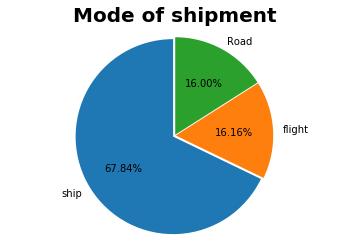

In [10]:
plt.pie(data.Mode_of_Shipment.value_counts(),explode=[.2,.1,.1],startangle=90,autopct='%.2f%%',labels=['ship','flight','Road'],radius=10,)
plt.axis('equal')
plt.title('Mode of shipment',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

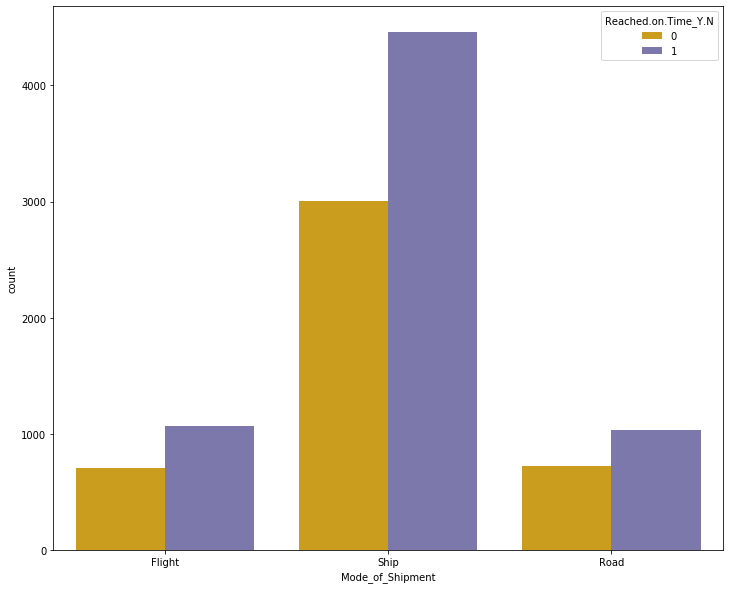

In [11]:
plt.figure(figsize=(12,10))
sns.countplot(data.Mode_of_Shipment,hue=label,palette='Dark2_r')
plt.show()

In [12]:
data.Mode_of_Shipment=pd.Categorical(data.Mode_of_Shipment,categories=['Ship','Flight','Road'],ordered=True).codes

## Importance Product

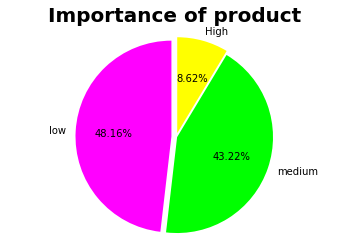

In [13]:
plt.pie(data.Product_importance.value_counts(),explode=[.5,.1,.4],startangle=90,autopct='%.2f%%',labels=['low','medium','High'],radius=10,colors=['#ff00ff','#00ff00','yellow'])
plt.axis('equal')
plt.title('Importance of product',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

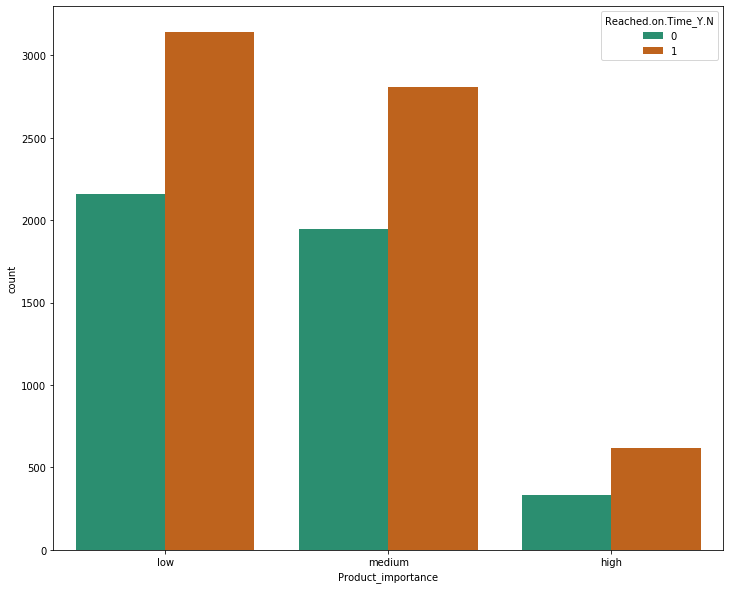

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(data.Product_importance,hue=label,palette='Dark2')
plt.show()

In [15]:
data.Product_importance=pd.Categorical(data.Product_importance,categories=['low','medium','High'],ordered=True).codes

## Gender

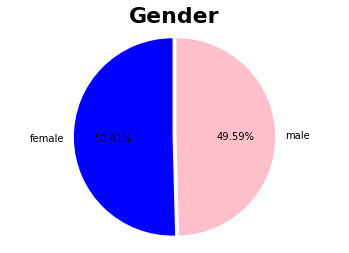

In [16]:
plt.pie(data.Gender.value_counts(),explode=[.1,.3],startangle=90,autopct='%.2f%%',labels=['female','male'],radius=10,colors=['blue','pink'])
plt.axis('equal')
plt.title('Gender',fontdict={'fontsize':22,'fontweight':'bold'})
plt.show()

In [17]:
data.Gender.value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

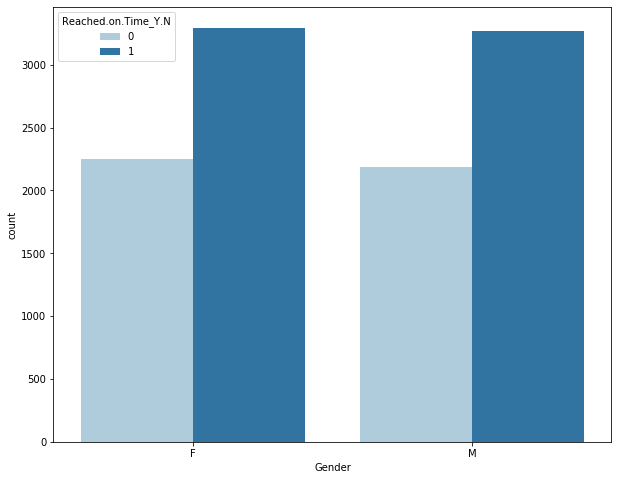

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data.Gender,hue=label,palette='Paired')
plt.show()

In [19]:
data.Gender=pd.Categorical(data.Gender,categories=['M','F'],ordered=True).codes

## Multi-variate annalysis

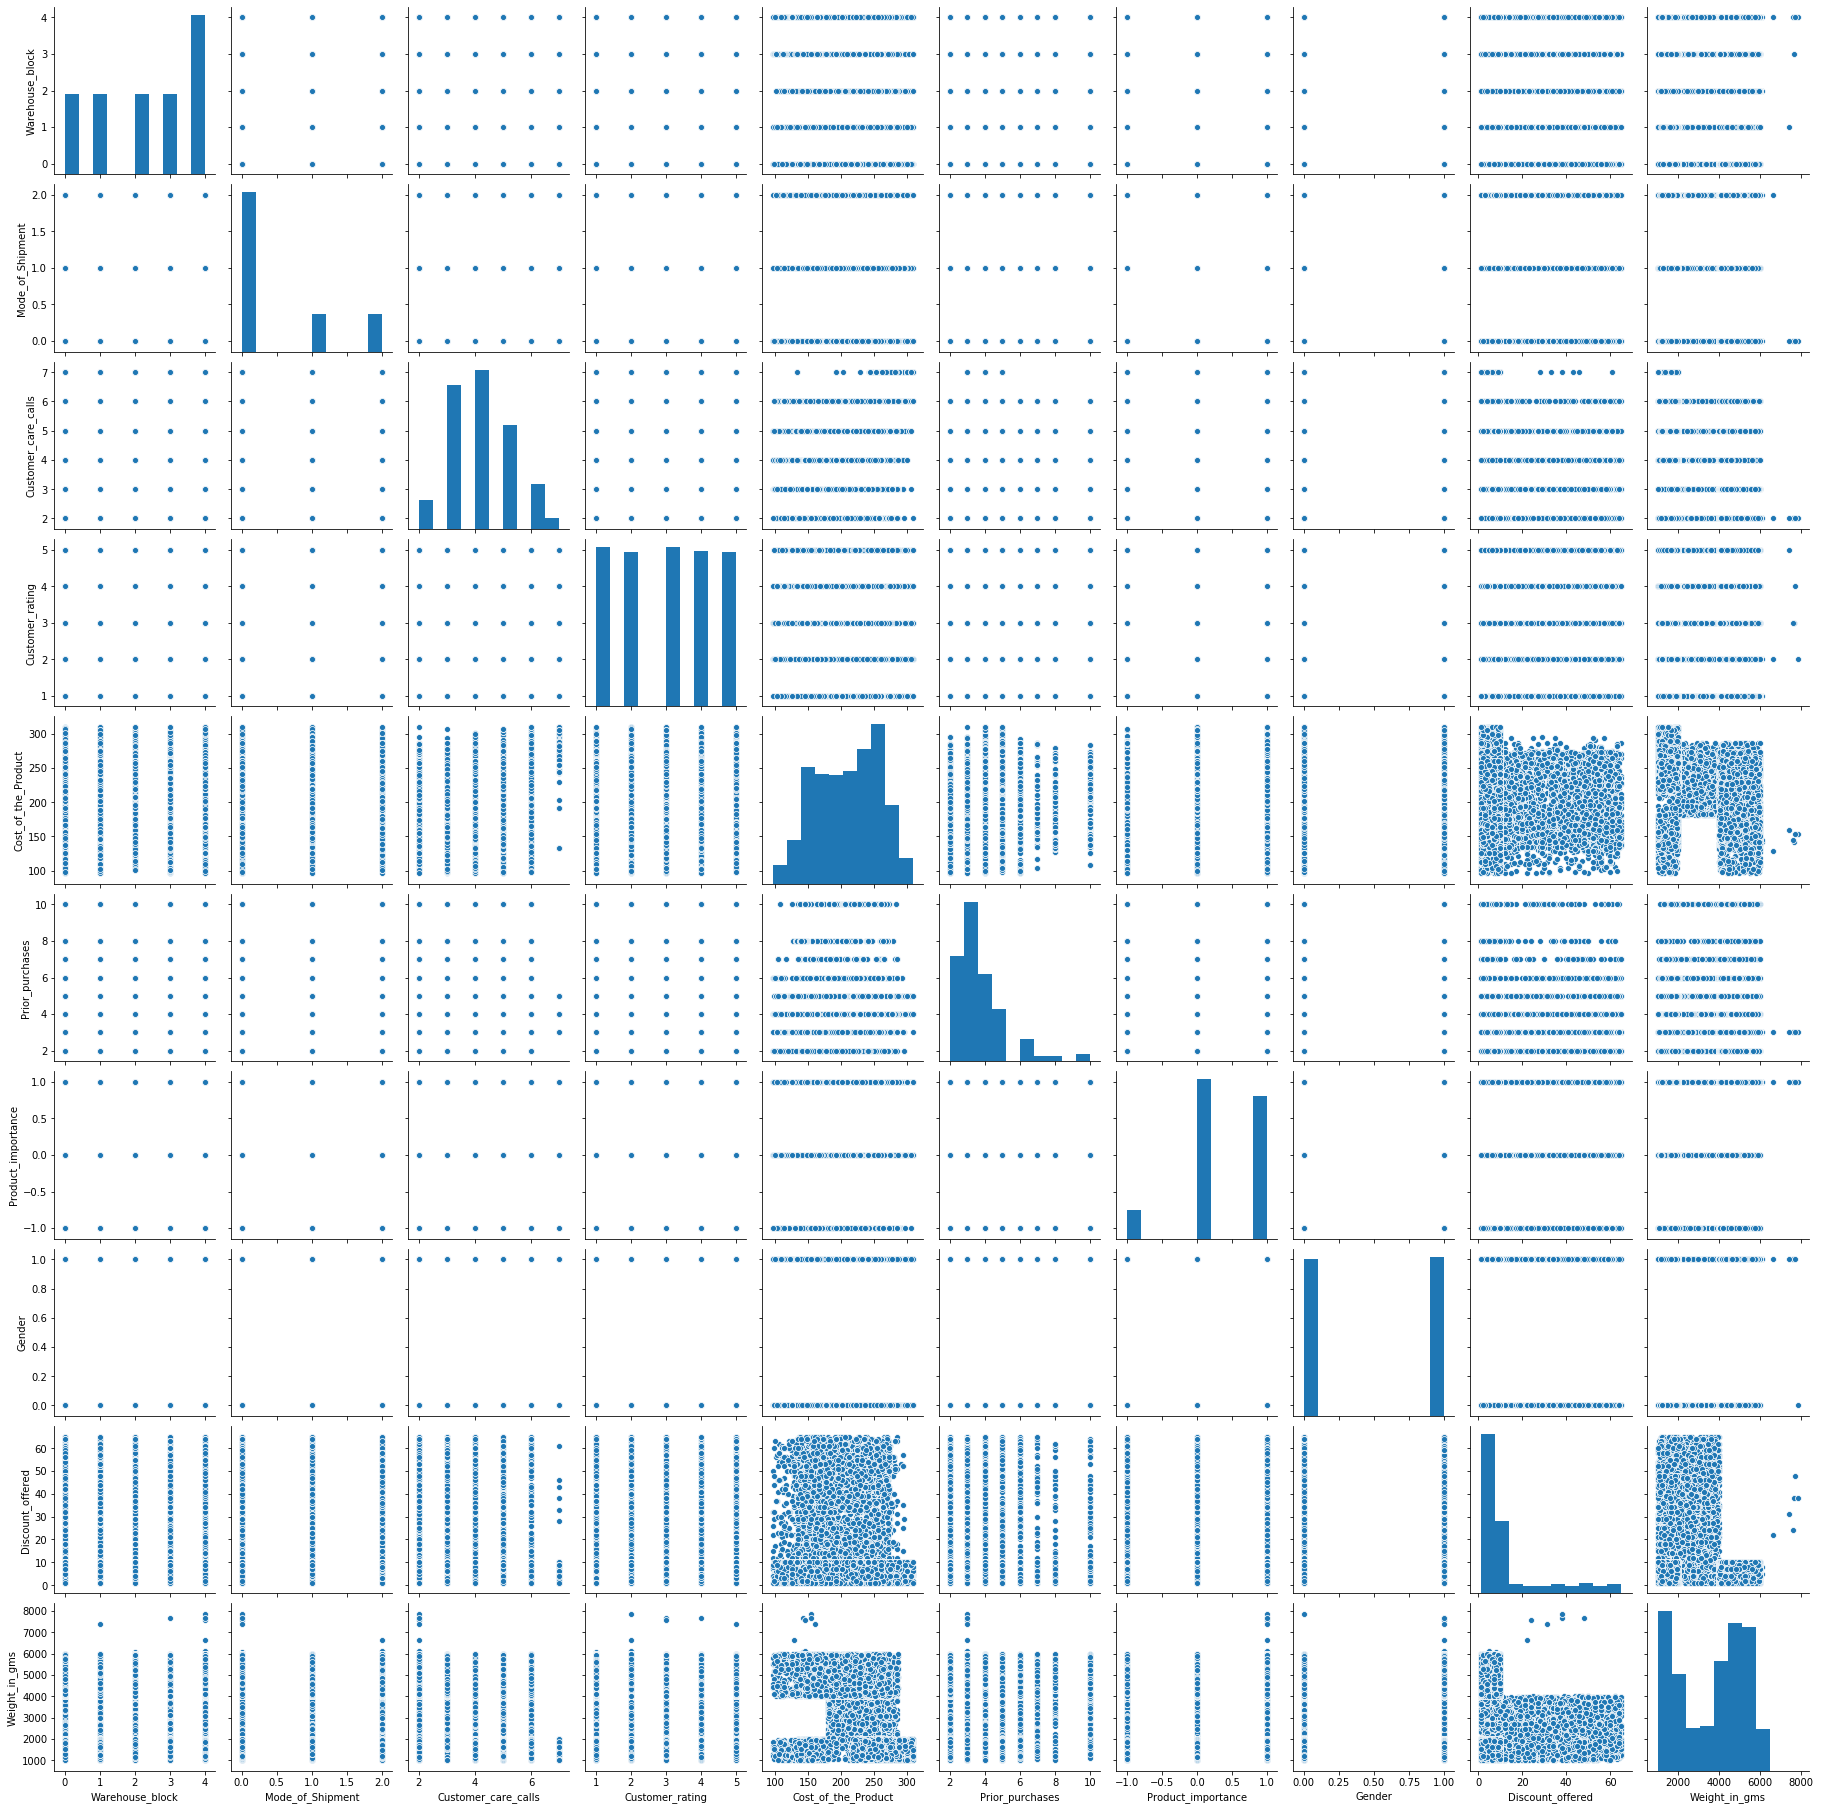

In [20]:

sns.pairplot(data)
plt.show()

[]

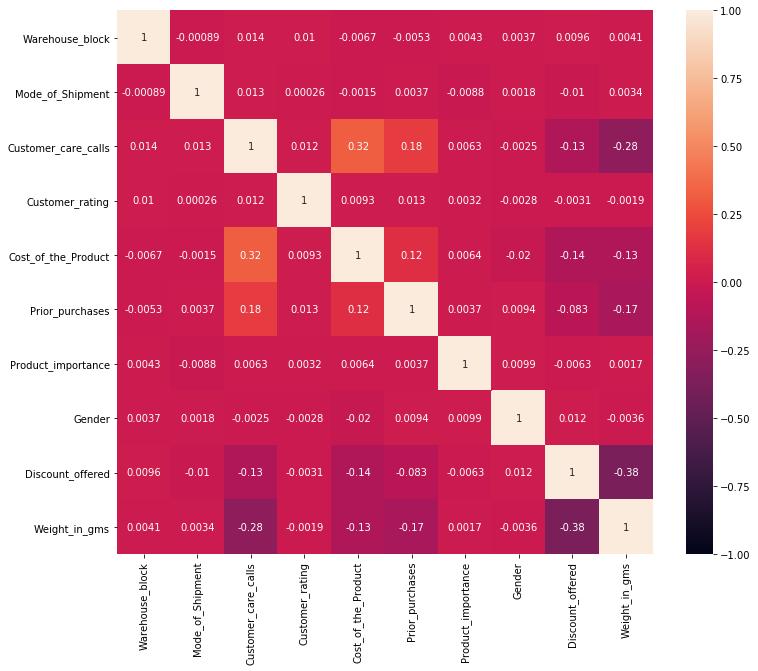

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,vmin=-1)
plt.plot()

## Spliting of data 

In [22]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data,label,test_size=.2,random_state=42)

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(tol=.01)
model1.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)

In [25]:
train_pred=model1.predict(train_x)
test_pred=model1.predict(test_x)
print('Classification Report of train_data \n',classification_report(train_y,train_pred))
print('Classification Report of test_data \n',classification_report(test_y,test_pred))

Classification Report of train_data 
               precision    recall  f1-score   support

           0       0.55      0.58      0.56      3541
           1       0.70      0.68      0.69      5258

    accuracy                           0.64      8799
   macro avg       0.63      0.63      0.63      8799
weighted avg       0.64      0.64      0.64      8799

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.54      0.56      0.55       895
           1       0.69      0.68      0.68      1305

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200



## DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
model2=GridSearchCV(DTC,param_grid={'max_depth':range(4,13),'criterion':['gini','entropy']})
model2.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [27]:
model2.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [28]:
train_pred=model2.predict(train_x)
test_pred=model2.predict(test_x)
print('Classification Report of train_data \n',classification_report(train_y,train_pred))
print('Classification Report of test_data \n',classification_report(test_y,test_pred))

Classification Report of train_data 
               precision    recall  f1-score   support

           0       0.57      0.94      0.71      3541
           1       0.93      0.52      0.67      5258

    accuracy                           0.69      8799
   macro avg       0.75      0.73      0.69      8799
weighted avg       0.79      0.69      0.69      8799

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.57      0.92      0.70       895
           1       0.91      0.52      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.74      0.72      0.68      2200
weighted avg       0.77      0.69      0.68      2200



## Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=42)
model3=GridSearchCV(RFC,param_grid={'max_depth':range(4,13),'criterion':['gini','entropy']})
model3.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

In [30]:
model3.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [31]:
train_pred=model3.predict(train_x)
test_pred=model3.predict(test_x)
print('Classification Report of train_data \n',classification_report(train_y,train_pred))
print('Classification Report of test_data \n',classification_report(test_y,test_pred))

Classification Report of train_data 
               precision    recall  f1-score   support

           0       0.57      0.96      0.72      3541
           1       0.96      0.51      0.66      5258

    accuracy                           0.69      8799
   macro avg       0.76      0.74      0.69      8799
weighted avg       0.80      0.69      0.68      8799

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.57      0.95      0.71       895
           1       0.94      0.51      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.79      0.69      0.68      2200



## AdaBoostClassifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier
model4=AdaBoostClassifier(n_estimators=100)
model4.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [33]:
train_pred=model4.predict(train_x)
test_pred=model4.predict(test_x)
print('Classification Report of train_data \n',classification_report(train_y,train_pred))
print('Classification Report of test_data \n',classification_report(test_y,test_pred))

Classification Report of train_data 
               precision    recall  f1-score   support

           0       0.59      0.80      0.68      3541
           1       0.82      0.62      0.71      5258

    accuracy                           0.69      8799
   macro avg       0.71      0.71      0.69      8799
weighted avg       0.73      0.69      0.70      8799

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.59      0.78      0.67       895
           1       0.81      0.62      0.70      1305

    accuracy                           0.69      2200
   macro avg       0.70      0.70      0.69      2200
weighted avg       0.72      0.69      0.69      2200



## KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
model5=GridSearchCV(estimator=KNN,param_grid={'n_neighbors':range(5,12)})
model5.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(5, 12)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [35]:
model5.best_params_

{'n_neighbors': 8}

In [36]:
train_pred=model5.predict(train_x)
test_pred=model5.predict(test_x)
print('Classification Report of train_data \n',classification_report(train_y,train_pred))
print('Classification Report of test_data \n',classification_report(test_y,test_pred))

Classification Report of train_data 
               precision    recall  f1-score   support

           0       0.63      0.85      0.73      3541
           1       0.87      0.67      0.76      5258

    accuracy                           0.74      8799
   macro avg       0.75      0.76      0.74      8799
weighted avg       0.78      0.74      0.75      8799

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.57      0.74      0.64       895
           1       0.77      0.62      0.69      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.68      0.67      2200
weighted avg       0.69      0.67      0.67      2200



### Conclusion:- Every Algoriths works quite well. With highest test accuracy of about 69% , Adaboost and Randomforest can be prefered model here.